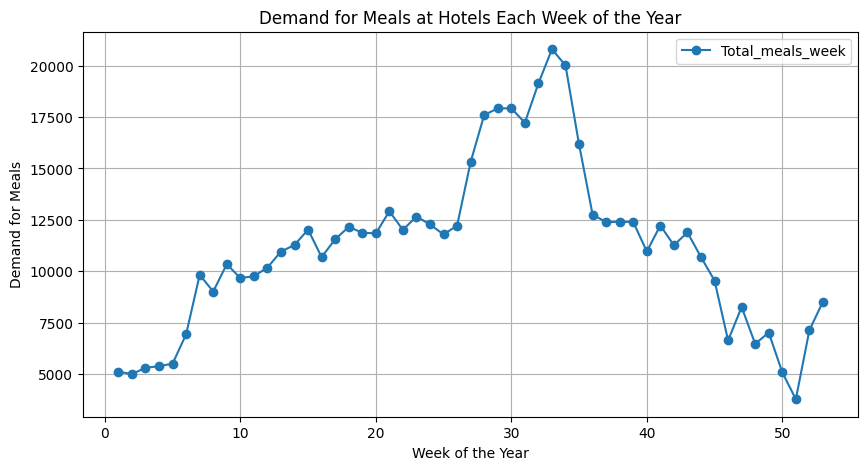

In [2]:
import pandas as pd #External library needed to analyse data
import matplotlib.pyplot as plt #Needed to allow the graph to be plotted


#hotel_data = pd.read_csv('hotel_bookings(1).csv')# Imports the data into the code
hotel_data = pd.read_csv('hotel_bookings.csv')


def calculate_meals_per_booking(current_record): # This is a function to return the meals per record

    if hotel_data.iloc[current_record,1] == 1:# Selection statement to set any cancelled bookings to zero
        meals_for_booking = 0
    else:
        days_stayed = hotel_data.iloc[current_record,7] + hotel_data.iloc[current_record,8]# Calculates how many nights stayed
        
            
        days_stayed +=  1 # Assume will stay either day of each night so should add one
    
        meals_type_multiplier = 0 # Variable to distinguish forms of catering
    
    
        if hotel_data.iloc[current_record,12] == 'FB': # Selection statement to distingush between forms of catering
            meals_type_multiplier = 3
        elif hotel_data.iloc[current_record,12] == 'BB' or hotel_data.iloc[current_record,12] == 'HB':
            meals_type_multiplier = 1
        else:
            meals_type_multiplier = 0 # Else statement for either self catered or records with no data.
   
    
        meals_per_booking_per_day = hotel_data.iloc[current_record,9] + 0.5*(hotel_data.iloc[current_record,10]) # Changes the demand depending on amount of children/adults
    
        meals_for_booking = meals_per_booking_per_day * meals_type_multiplier * days_stayed # Calculates total  to return
        
    return meals_for_booking # Uses function in order to return the value
    

#defining a dictionary to store the data calculated for each week.


week_data = {  # Creates a dictionary to store the data in.
    'Week_index' : [],
    'Total_meals_week' :[]
}

for counter_dictionary in range(54):  # For loop to populate the dictionary.
    week_data['Week_index'].append(counter_dictionary)
    week_data['Total_meals_week'].append(0)


# Creating and setting necessary variables to 0.
    
current_booking = 0
week_total = 0
current_week_val = 0
new_week_val = 0



for counter_records in range(len(hotel_data)-1): # For loop to iterate through each record in the csv file.
    
    current_week_val = hotel_data.iloc[current_booking,5] # Looks at the week valjue of each record.
    
    if not pd.isna(current_week_val): # Only enters this selection statement if there is a value for the week present
        
       
        week_index = int(current_week_val) # Selects the approprate key for the record.
        week_data['Total_meals_week'][week_index] += calculate_meals_per_booking(current_booking) # Calls the function and adds it to the current total.
       
      
    current_booking += 1  # Iterates through csv file.
        
# Uses import matplotlib.pyplot to plot the graph

plot_graph = pd.DataFrame(week_data)
plot_graph.set_index('Week_index', inplace=True)
plot_graph = plot_graph[plot_graph.index != 0]

plot_graph.plot( y= 'Total_meals_week', kind='line', marker='o', figsize=(10,5), title="Demand for Meals at Hotels Each Week of the Year")

# Show the plot
plt.xlabel("Week of the Year")
plt.ylabel("Demand for Meals")
plt.grid(True)



plt.show()


I have used the data provided to analyse how demand for hotel meals changes through the year. This is a vital question for any hotel to answer, as with predictions for demand they are able to tailor the amount of labour they employ at different times of the year, as well as how many supplies to order in. This ensures no wasted money, but they can also ensure a quality service. To analyse how demand changes through the year I use the week of the year attribute (as seen on the y-axis) and then a combination of the other variables to measure demand for meals. This includes the length of the stay, which form of catering they want, weather the booking was cancelled, as well as whether the booking included children or babies. The chart above shows the results, that there is a peak over summer, with demand gently building up and then down either side. It also shows a low point in week 51 which shows not many people want hotel meals over Christmas. This data is vital in helping a hotel prepare food orders through each of the seasons, for instance without these insights they may have over-ordered at Christmas and so wasted money.



Overall mark: 63

#### Business Question:
The business question is clearly identified, which is well connected to the given dataset. The significance of answering the question is also explained. Solid evidence is presented to derive the findings and implications. Improvements could include providing some actionale suggestions for hotels.

<u>Very Good</u>

#### Data:
The data selection is comprehensive and effective, which includes many different variables. The rationale of choosing these variables is explained. Data conditioning and the transformation of variables are used appropriately, showing good understanding of data manipulation, though sometimes the reason to use these techniques is not addressed clearly.

<u>Good</u>

#### Visualization:
A time-series plot is used for the visualization purpose, which is sufficient to support the findings. The plot come with essential elements of the title, axis lables and ticks. Legend is provided for clarity, yet it is suggested to label the time-series as the y-axis label for consistency. Further improvements could include using other type of plots to support your findings.

<u>Good</u>

#### Code:
The code structure is overall clear. There are no obvious errors, expcet a minor issue in data importing (you should use the file name 'hotel_bookings.csv' as provided, instead the file with modified name that only exists on your machine). The main functionality is wrapped in a separate function, which shows good coding technique. However, the over use of for loop should be avoided, as this will significantly reduce the efficiency of the code. Consider to use list comprehension instead where possible. Additionally, it is suggested to separate the code into different cells according to functionality, which can improve the overall readability.

<u>Good</u>